In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.43


In [18]:
def build(robot):
    R=.5
    r=R/5
    
    x=10
    y=10
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name='center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)

In [19]:
def up(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 90'].F=10
    return True

In [20]:
def monitor(t,robot):
    robot.message=t,robot.controller.current_state

In [21]:
def keep_close_to_the_right(t,robot):
    distance=robot['disk 0'].read_distance()
    
    if distance<3:
        robot['disk 0'].F=-10
    else:
        robot['disk 0'].F=10
        

In [22]:
state_machine=StateMachine(
    (up,'keep_close_to_the_right'),
    (keep_close_to_the_right,"_end_simulation")
)


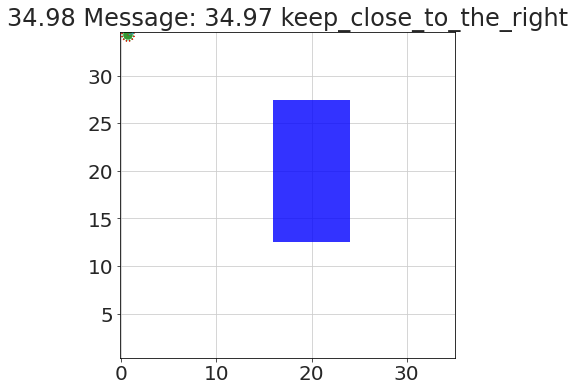

In [23]:
env=FrictionEnvironment(35,35)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

Box(env,x=20,y=20,width=8,height=15)


run_sim(env,robot.controller, 
        figure_width=6,
       total_time=30,
       dt_display=.3,  # make this larger for a faster display
       )


<Figure size 432x432 with 0 Axes>

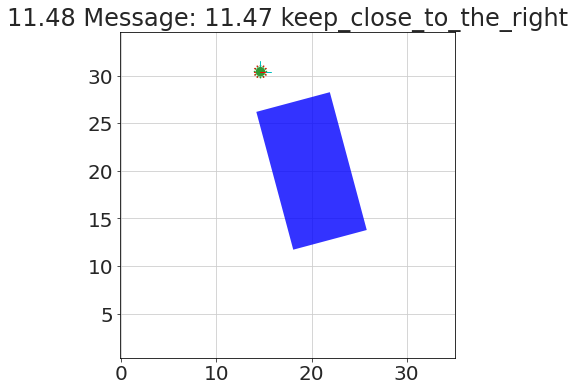

In [25]:
env=FrictionEnvironment(35,35)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

Box(env,x=20,y=20,width=8,height=15,angle=15)


run_sim(env,robot.controller, 
        figure_width=6,
       total_time=30,
       dt_display=.3,  # make this larger for a faster display
       )


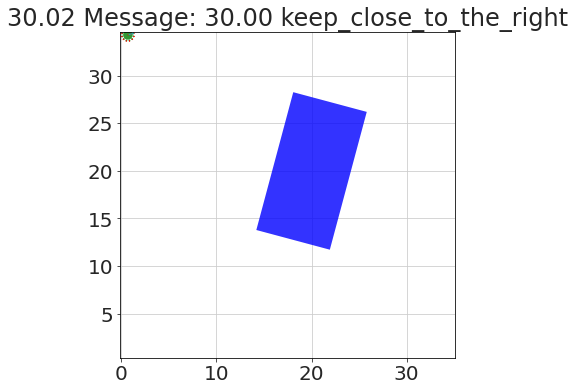

In [26]:
env=FrictionEnvironment(35,35)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

Box(env,x=20,y=20,width=8,height=15,angle=-15)


run_sim(env,robot.controller, 
        figure_width=6,
       total_time=30,
       dt_display=.3,  # make this larger for a faster display
       )
